In [10]:
import numpy as np
import pandas as pd
from brokenaxes import brokenaxes
from sklearn import preprocessing

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 10}

PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.random.seed(12345)

import matplotlib.pyplot as plt
import matplotlib
plt.rc('figure', figsize=(10,6))
plt.rc('font', **font)
np.set_printoptions(precision=4, suppress=True)



In [11]:
# case_namelist = ['pfclm1_base1','pfclm1_base40',
#                 'pfclm2_base1','pfclm2_base40']
case_namelist = ['pfclm2_base40']

time_length=336

n_namelist=len(case_namelist)

# Reading the data

In [12]:
################################################## load precipitation, in unit of mm/s
clm_input_path= '/home/chaochen/payette/chaochen/CZO/Chao/Demonstration_example/landlab_Const.Saprolite/clm_input'
clm_input='narr_1hr_new_extended.txt'
file = np.loadtxt('%s/%s' %(clm_input_path,clm_input)) 
precip_mms=file[:,2] 

################################################## load ET, in unit of mm/s
# ET_mms= pd.DataFrame(index=np.arange(0,time_length, 1), columns=case_namelist)
# sfpath_ET = '/home/chaochen/payette/chaochen/CZO/Chao/Demonstration_example/landlab_Const.Saprolite/postprocessing/ET_cal'

# # ET volume is in unit of mm/s
# for case_index in case_namelist:
#     file_name_index= ('ET_volume_%s.csv' %(case_index))
#     ET_mms[case_index]= pd.read_csv('%s/%s' %(sfpath_ET,file_name_index)).iloc[:,1]
# print (ET_mms)

### load sub-surface storage
sfpath = '/home/chaochen/payette/chaochen/CZO/Chao/Demonstration_example/landlab_Const.Saprolite/postprocessing/subsurfacestorage_cal'
outputfile_soilname = 'pfclm_soil_storage_depth.csv'
outputfile_saproname = 'pfclm_sapro_storage_depth.csv'


df_soil = pd.read_csv('%s/%s' %(sfpath,outputfile_soilname),names=case_namelist)
# max_soil=pd.DataFrame(df_soil.max(),
#                   index=np.arange(0, time_length, 1))

df_sapro = pd.read_csv('%s/%s' %(sfpath,outputfile_saproname),names=case_namelist)
# max_sapro=pd.DataFrame(df_sapro.max(),
#                   index=np.arange(0,time_length, 1))

################################################# read surface storage (SS)
### load surface storage, in unit of cubic meters
Datum_SS= pd.DataFrame(index=np.arange(0,time_length, 1), columns=case_namelist)
sfpath_SS = '/home/chaochen/payette/chaochen/CZO/Chao/Demonstration_example/landlab_Const.Saprolite/postprocessing/surfacestorage_cal'

for case_index in case_namelist:
    file_name_index= ('surface_storage_depth_%s.csv' %(case_index))
    Datum_SS[case_index]= pd.read_csv('%s/%s' %(sfpath_SS,file_name_index)).iloc[:,1]
# print (Datum_SS)


################################################ read surface rnoff (SR, water running out of the domain)
#### read surface runoff (SR), these csv files are coming from the computation output using pftools
Datum_SR_volume= pd.DataFrame(index=np.arange(0,time_length, 1), columns=case_namelist)
sfpath_SR='/home/chaochen/payette/chaochen/CZO/Chao/Demonstration_example/landlab_Const.Saprolite/postprocessing/waterbalance_cal/csv'

for case_index in case_namelist:
    file_name_index= ('total_surface_runoff_%s.csv' %(case_index))
    Datum_SR_volume[case_index]= pd.read_csv('%s/%s' %(sfpath_SR,file_name_index)).iloc[:,1]
Datum_SR=Datum_SR_volume/30/30/198/198




# Functions (remove the outliers)

In [13]:
# function of smooth the data, removin thing peaks and abrupt changes
def series_smooth(df_in):
    temp_result=df_in.copy()
    for i in range(len(df_in)):
        if i==0 or i==699:
            temp_result[i]=df_in[i]
        else:
            if (temp_result[i-1]-df_in[i])/temp_result[i-1]>0.5 or (temp_result[i-1]-df_in[i])/temp_result[i-1]<-0.5:
                temp_result[i]= (temp_result[i-1]+df_in[i+1])/2  
            else:
                temp_result[i]=df_in[i]
    return temp_result


# Computation, applying functions

### Computation, clean the data apply the functions (note: array may work better, for let it be for now)

In [14]:
# df_soil_smooth=pd.DataFrame(np.random.randint(low=0, high=10, size=(700, 10)),columns=case_namelist)
df_soil_final=pd.DataFrame(np.random.randint(low=0, high=10, size=(time_length, n_namelist)),columns=case_namelist)
df_sapro_final=pd.DataFrame(np.random.randint(low=0, high=10, size=(time_length, n_namelist)),columns=case_namelist)

In [15]:
# finalze the soil storage and saprolite storage,remove the outlier by calling the function
for i in range(n_namelist):
    name_index=case_namelist[i]
    df_soil_final[name_index]=series_smooth(df_soil[name_index])
    df_sapro_final[name_index]=series_smooth(df_sapro[name_index])
    
# finalize the total subsurface water storage    
df_water_total=df_sapro_final+df_soil_final


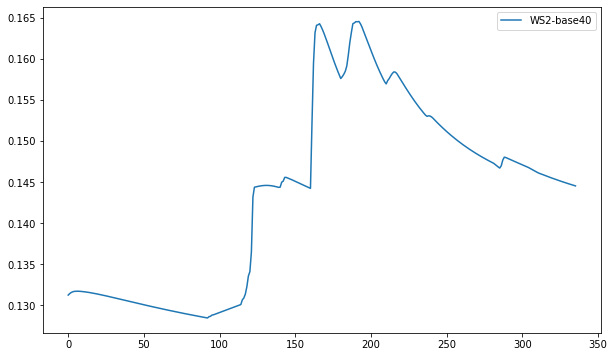

In [16]:
plt.plot(df_soil_final.iloc[:,:])
# plt.legend(["WS1-base1","WS1-base40","WS2-base1","WS2-base40"])
plt.legend(["WS2-base40"])

In [ ]:
print (df_soil_final)

## Plot

### plot the water storage in precipitation, surface water, soil water, and saprolite water

No handles with labels found to put in legend.


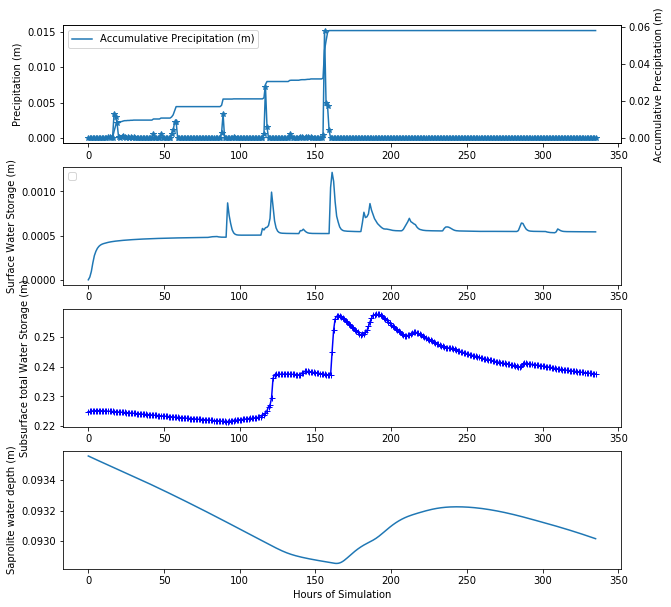

<function matplotlib.pyplot.close(fig=None)>

In [36]:
###### plot the sum of soil and sparolite water storage
## plot the precipitation
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(4,1, 1)
# data conversion, from meter per second to meter per hour
precip_mh=precip_mms*3600/1000
plt.plot(precip_mh,'*-',label='Precipitation')
plt.ylabel("Precipitation (m)")

a1x=ax.twinx()
plt.plot(precip_mh.cumsum() ,label='Accumulative Precipitation (m)')
plt.ylabel("Accumulative Precipitation (m)")
plt.legend(loc='upper left')


## plot the surface storage, in unit of m
cx = fig.add_subplot(4,1, 2)
Datum_SS_m=Datum_SS # it's already converted into depth
plt.plot(Datum_SS_m.iloc[:,0])
plt.ylabel("Surface Water Storage (m)")
plt.legend(loc='upper left')

## total subsurface water storage
bx = fig.add_subplot(4,1, 3)
plt.plot(df_water_total.iloc[:,0],'b+-',label='WS2-fluvial watershed, Saprolite/Soil =40')
plt.ylabel("Subsurface total Water Storage (m)")

## seperate subsurface storage
# plot, saprolite
fig.add_subplot(4, 1,4)
plt.plot(df_sapro_final.iloc[:,0])
# plt.plot(df_soil_final.iloc[:,0])
plt.ylabel("Saprolite water depth (m)")

plt.xlabel("Hours of Simulation")
# plt.legend(["saprolite water storage","soil water storage"])
# plt.ylim(3.7,3.75)
# plt.ylim(3.875,3.92)
# plt.savefig('WaterContentComparisons_PFCLM.png')




plt.show()
plt.close

No handles with labels found to put in legend.


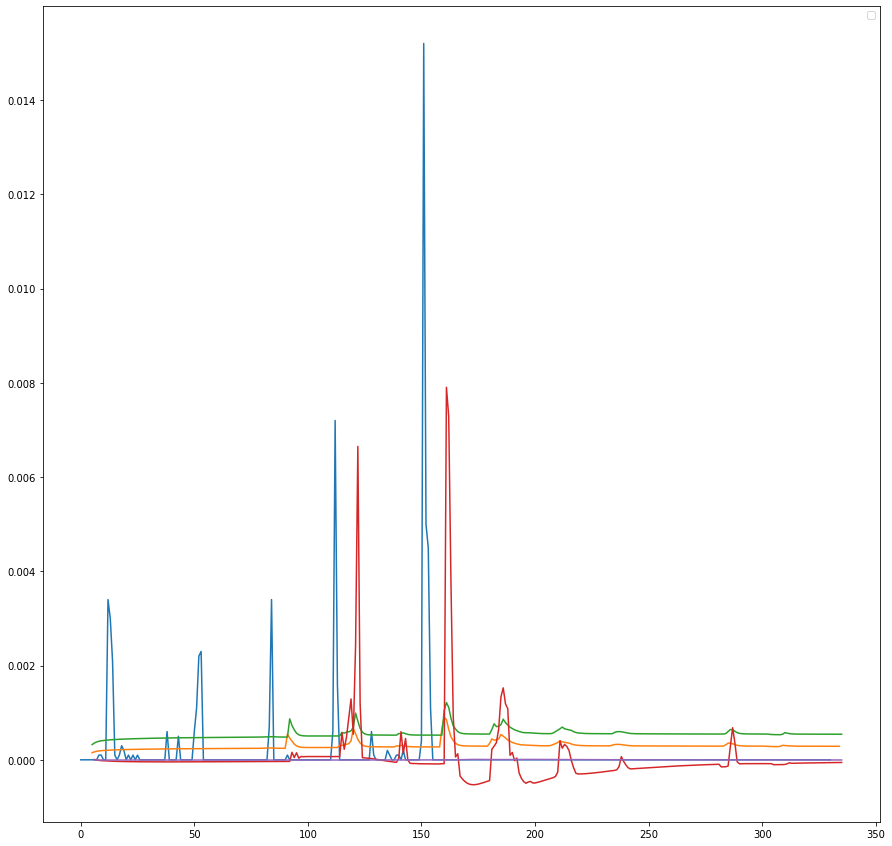

In [53]:
# comtributor analyses in water balance, WS1-base40
fig = plt.figure(figsize=(15, 15))
plt.legend()
plt.plot(precip_mh[5:time_length,],label='precp')
plt.plot(Datum_SR.iloc[5:time_length,0])
plt.plot(Datum_SS.iloc[5:,0])
plt.plot(df_soil_final.iloc[5:,0].diff())
plt.plot(df_sapro_final.iloc[5:,0].diff())

# plt.plot(precip_mh[5:time_length,]-Datum_SR.iloc[5:time_length,0],label='precp-surface runoff')
# plt.plot(precip_mh[5:time_length,]-Datum_SR.iloc[5:,0]+Datum_SS.iloc[5:,0].diff(),label='precp-surface runoff+ surface storage change')
# plt.plot(precip_mh[5:time_length,]-Datum_SR.iloc[5:,0]+df_soil_final.iloc[5:,0].diff(),label='precp-surface runoff+ soil sotrage change')
# plt.plot(precip_mh[5:time_length,]-Datum_SR.iloc[5:,0]+df_sapro_final.iloc[5:,0].diff(),label='precp-surface runoff+saprolite storage change')
# plt.plot(Datum_SR.iloc[5:,0],label='Surface Runoff')
# plt.legend()

In [ ]:
# comtributor analyses in water balance, WS1-base40
fig = plt.figure(figsize=(15, 15))

# plt.plot(precip_mmh[5:time_length,],label='precp')
# plt.plot(precip_mmh[5:time_length,]/1000-Datum_SR.iloc[5:,3],label='precp-surface runoff')
plt.plot(Datum_SS.iloc[5:,1].diff(),label='surface storage change')
# plt.plot(df_soil_final.iloc[5:,1].diff(),label='soil sotrage change')
# plt.plot(df_sapro_final.iloc[5:,1].diff(),label='saprolite storage change')
plt.plot(Datum_SR.iloc[5:,1],label='Surface Runoff')
plt.legend()

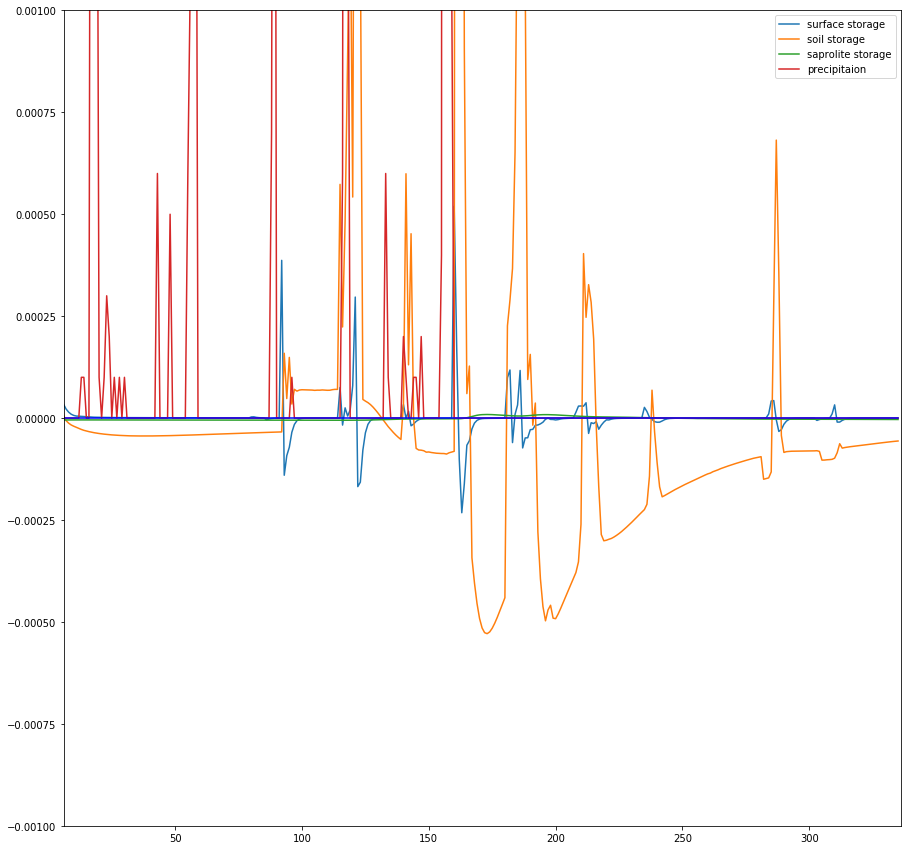

In [34]:
# sum of all the water componets, except precipitation
fig = plt.figure(figsize=(15, 15))
plt.plot(Datum_SS_m.iloc[:,0].diff(), label='surface storage')
plt.plot(df_soil_final.iloc[:,0].diff(), label='soil storage')
plt.plot(df_sapro_final.iloc[:,0].diff(),label='saprolite storage')
plt.plot(precip_mh,label='precipitaion')
# plt.plot(Datum_SS_m.iloc[:,0].diff()+df_soil_final.iloc[:,0].diff()+df_sapro_final.iloc[:,0].diff()-precip_mmh,label='WS1-B1')
# plt.plot(Datum_SS_m.iloc[:,1].diff()+df_soil_final.iloc[:,1].diff()+df_sapro_final.iloc[:,1].diff()-precip_mmh,label='WS1-B40')
# plt.plot(Datum_SS_m.iloc[:,2].diff()+df_soil_final.iloc[:,2].diff()+df_sapro_final.iloc[:,2].diff()-precip_mmh,label='WS2-B1')
# plt.plot(Datum_SS_m.iloc[:,3].diff()+df_soil_final.iloc[:,3].diff()+df_sapro_final.iloc[:,3].diff()-precip_mh+ET_mms.iloc[:,3]/10000000,label='WS2-B40')
plt.plot(df_sapro_final.iloc[5:,0]*0, color='b')
plt.xlim(6,time_length)
plt.ylim(-0.001,0.001)
plt.ylabel("")
plt.legend()